In [1]:
from keras.datasets import mnist
from sklearn.utils import shuffle
from models.VLAE import VLAE

vlae = VLAE(input_dim=(28, 28, 1), log_dir="", kernel_visualization_layer=1, num_samples=1, feature_map_layers=[1], inner_activation="ReLU", decay_rate=0, feature_map_reduction_factor=1, z_dims=[2,2,2])
vlae.load_weights("/Users/leo/Downloads/vlae.h5")

Using TensorFlow backend.


In [2]:
from models.VAE import VariationalAutoencoder

vae = VariationalAutoencoder(input_dim=(128,128,1),encoder_conv_filters=[32, 64, 64, 64],encoder_conv_kernel_size=[3, 3, 3, 3], encoder_conv_strides=[2, 2, 2, 2],decoder_conv_t_filters=[64, 64, 32, 1],decoder_conv_t_kernel_size=[3, 3, 3, 3],decoder_conv_t_strides=[2, 2, 2, 2],z_dims=[2], log_dir="", feature_map_layers=[], kernel_visualization_layer=1, dropout_rate=0.3, use_batch_norm=True, use_dropout=True)
vae.load_weights("/Users/leo/Downloads/vanilla_vae.h5")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
import numpy as np
import scipy as sp
from utils.img_ops import resize_array
(_,_),(mnists,_) = mnist.load_data()
mnists = shuffle(mnists)
mnists = mnists.reshape((mnists.shape[0], -1))
mnist_mean = np.mean(mnists, axis=0)
mnist_sd = np.std(mnists, axis=0)
mnist_skew = sp.stats.skew(mnists, axis=0)
mnist_kurt = sp.stats.kurtosis(mnists, axis=0)

vlae_gens = vlae.decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000) for _ in range(3)]).squeeze()
vlae_gens = np.stack(vlae_gens)
vlae_gens *= 255.0
vlae_gens = vlae_gens.reshape(vlae_gens.shape[0], -1)
vlae_gens_mean = np.mean(vlae_gens, axis=0)
vlae_gens_sd = np.std(vlae_gens, axis=0)
vlae_gens_skew = sp.stats.skew(vlae_gens, axis=0)
vlae_gens_kurt = sp.stats.kurtosis(vlae_gens, axis=0)

vae_gens = vae.decoder.predict(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000))
vae_gens = np.stack(vae_gens)
vae_gens *= 255.0
vae_gens = resize_array(vae_gens, (28,28), False)
vae_gens = vae_gens.reshape(vae_gens.shape[0], -1)
vae_gens_mean = np.mean(vae_gens, axis=0)
vae_gens_sd = np.std(vae_gens, axis=0)
vae_gens_skew = sp.stats.skew(vae_gens, axis=0)
vae_gens_kurt = sp.stats.kurtosis(vae_gens, axis=0)

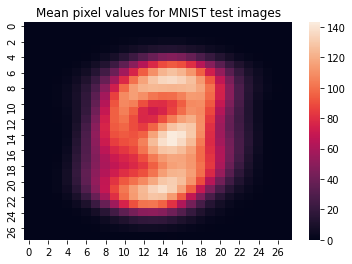

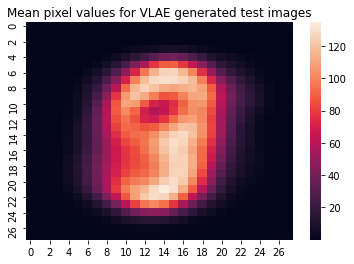

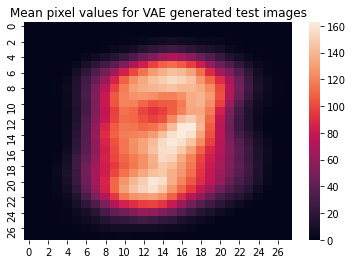

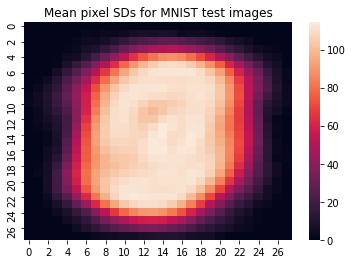

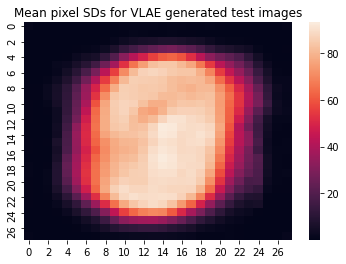

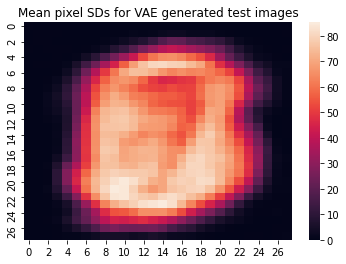

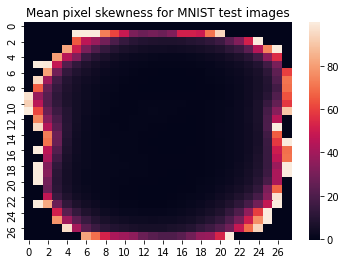

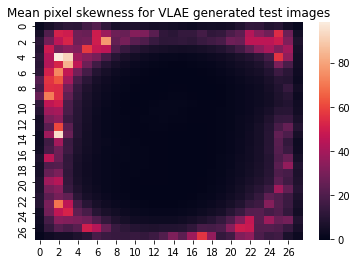

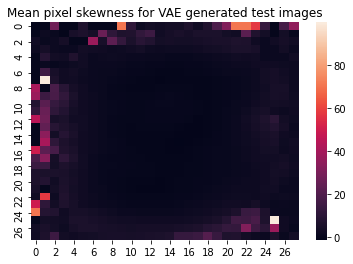

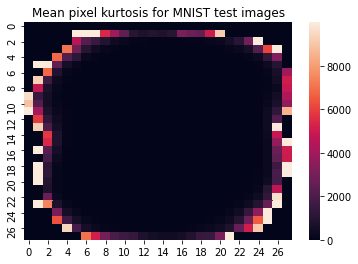

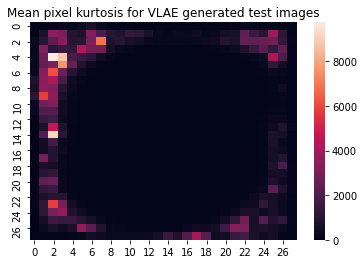

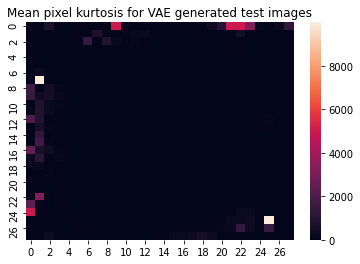

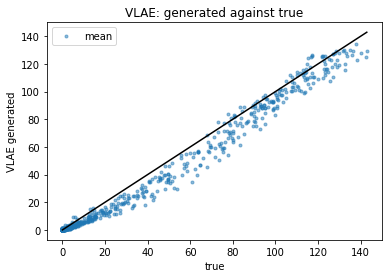

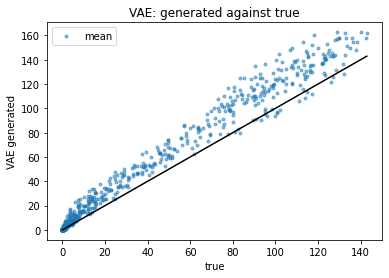

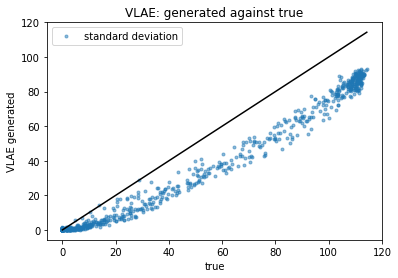

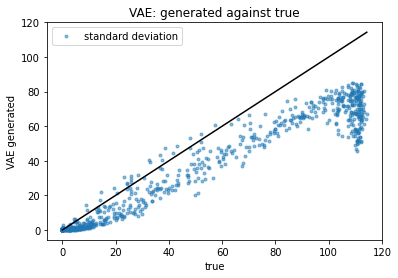

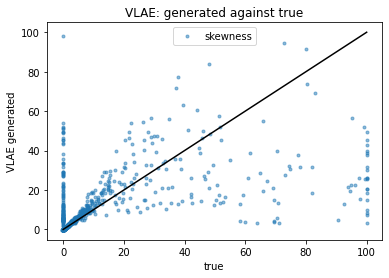

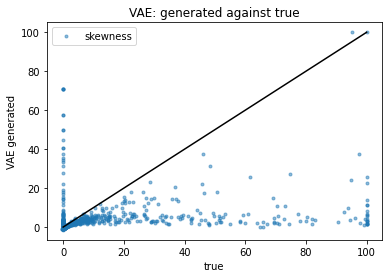

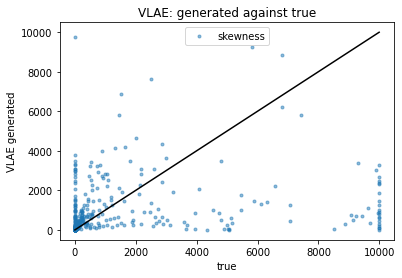

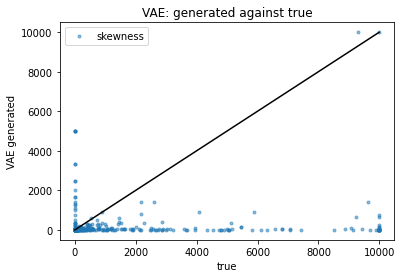

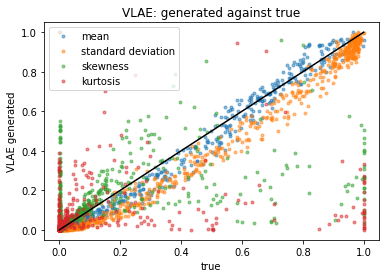

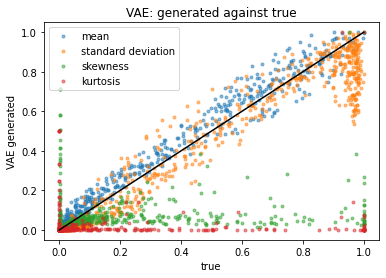

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def _clamp(x):
    return (x - x.min())/(x.max() - x.min())

x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
maxx = max([mnist_mean.max(), mnist_sd.max(), vlae_gens_mean.max(), vlae_gens_sd.max()])

sns.heatmap(mnist_mean.reshape((28, 28)))
plt.title("Mean pixel values for MNIST test images")
plt.show()
plt.close()

sns.heatmap(vlae_gens_mean.reshape((28, 28)))
plt.title("Mean pixel values for VLAE generated test images")
plt.show()
plt.close()

sns.heatmap(vae_gens_mean.reshape((28, 28)))
plt.title("Mean pixel values for VAE generated test images")
plt.show()
plt.close()

sns.heatmap(mnist_sd.reshape((28, 28)))
plt.title("Mean pixel SDs for MNIST test images")
plt.show()
plt.close()

sns.heatmap(vlae_gens_sd.reshape((28, 28)))
plt.title("Mean pixel SDs for VLAE generated test images")
plt.show()
plt.close()

sns.heatmap(vae_gens_sd.reshape((28, 28)))
plt.title("Mean pixel SDs for VAE generated test images")
plt.show()
plt.close()

sns.heatmap(mnist_skew.reshape((28, 28)))
plt.title("Mean pixel skewness for MNIST test images")
plt.show()
plt.close()

sns.heatmap(vlae_gens_skew.reshape((28, 28)))
plt.title("Mean pixel skewness for VLAE generated test images")
plt.show()
plt.close()

sns.heatmap(vae_gens_skew.reshape((28, 28)))
plt.title("Mean pixel skewness for VAE generated test images")
plt.show()
plt.close()

sns.heatmap(mnist_kurt.reshape((28, 28)))
plt.title("Mean pixel kurtosis for MNIST test images")
plt.show()
plt.close()

sns.heatmap(vlae_gens_kurt.reshape((28, 28)))
plt.title("Mean pixel kurtosis for VLAE generated test images")
plt.show()
plt.close()

sns.heatmap(vae_gens_kurt.reshape((28, 28)))
plt.title("Mean pixel kurtosis for VAE generated test images")
plt.show()
plt.close()

plt.plot((mnist_mean), (vlae_gens_mean), '.', label='mean', alpha=0.5)
plt.plot([0.0, mnist_mean.max()], [0.0, mnist_mean.max()], c='k')
plt.legend()
plt.title('VLAE: generated against true')
plt.xlabel("true")
plt.ylabel("VLAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

plt.plot((mnist_mean), (vae_gens_mean), '.', label='mean', alpha=0.5)
plt.plot([0.0, mnist_mean.max()], [0.0, mnist_mean.max()], c='k')
plt.legend()
plt.title('VAE: generated against true')
plt.xlabel("true")
plt.ylabel("VAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

plt.plot((mnist_sd), (vlae_gens_sd), '.', label='standard deviation', alpha=0.5)
plt.plot([0.0, mnist_sd.max()], [0.0, mnist_sd.max()], c='k')
plt.legend()
plt.title('VLAE: generated against true')
plt.xlabel("true")
plt.ylabel("VLAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

plt.plot((mnist_sd), (vae_gens_sd), '.', label='standard deviation', alpha=0.5)
plt.plot([0.0, mnist_sd.max()], [0.0, mnist_sd.max()], c='k')
plt.legend()
plt.title('VAE: generated against true')
plt.xlabel("true")
plt.ylabel("VAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

plt.plot((mnist_skew), (vlae_gens_skew), '.', label="skewness", alpha=0.5)
plt.plot([0.0, mnist_skew.max()], [0.0, mnist_skew.max()], c='k')
plt.legend()
plt.title('VLAE: generated against true')
plt.xlabel("true")
plt.ylabel("VLAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

plt.plot((mnist_skew), (vae_gens_skew), '.', label="skewness", alpha=0.5)
plt.plot([0.0, mnist_skew.max()], [0.0, mnist_skew.max()], c='k')
plt.legend()
plt.title('VAE: generated against true')
plt.xlabel("true")
plt.ylabel("VAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

plt.plot((mnist_kurt), (vlae_gens_kurt), '.', label="skewness", alpha=0.5)
plt.plot([0.0, mnist_kurt.max()], [0.0, mnist_kurt.max()], c='k')
plt.legend()
plt.title('VLAE: generated against true')
plt.xlabel("true")
plt.ylabel("VLAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

plt.plot((mnist_kurt), (vae_gens_kurt), '.', label="skewness", alpha=0.5)
plt.plot([0.0, mnist_kurt.max()], [0.0, mnist_kurt.max()], c='k')
plt.legend()
plt.title('VAE: generated against true')
plt.xlabel("true")
plt.ylabel("VAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

plt.plot(_clamp(mnist_mean), _clamp(vlae_gens_mean), '.', label='mean', alpha=0.5)
plt.plot(_clamp(mnist_sd), _clamp(vlae_gens_sd), '.', label="standard deviation", alpha=0.5)
plt.plot(_clamp(mnist_skew), _clamp(vlae_gens_skew), '.', label="skewness", alpha=0.5)
plt.plot(_clamp(mnist_kurt), _clamp(vlae_gens_kurt), '.', label="kurtosis", alpha=0.5)
plt.plot([0.0, 1.0], [0.0, 1.0], c='k')

plt.legend()
plt.title('VLAE: generated against true')
plt.xlabel("true")
plt.ylabel("VLAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

plt.plot(_clamp(mnist_mean), _clamp(vae_gens_mean), '.', label='mean', alpha=0.5)
plt.plot(_clamp(mnist_sd), _clamp(vae_gens_sd), '.', label="standard deviation", alpha=0.5)
plt.plot(_clamp(mnist_skew), _clamp(vae_gens_skew), '.', label="skewness", alpha=0.5)
plt.plot(_clamp(mnist_kurt), _clamp(vae_gens_kurt), '.', label="kurtosis", alpha=0.5)
plt.plot([0.0, 1.0], [0.0, 1.0], c='k')

plt.legend()
plt.title('VAE: generated against true')
plt.xlabel("true")
plt.ylabel("VAE generated")
#plt.plot(e, mnist_mean, 'gx')
plt.show()
plt.close()

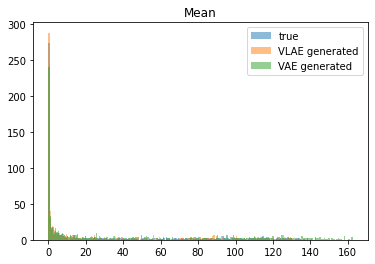

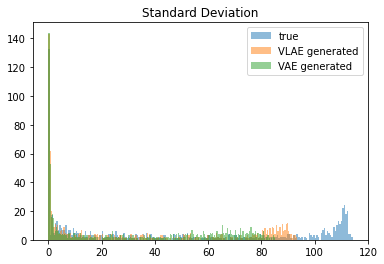

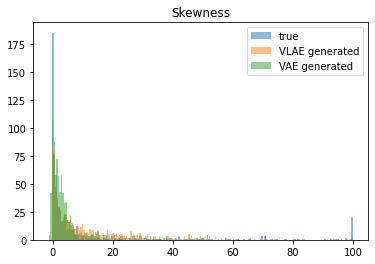

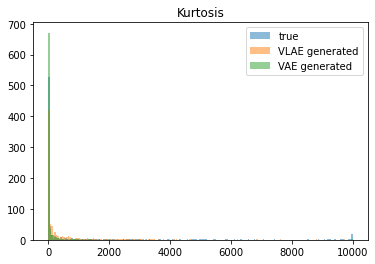

In [5]:
bins = 200
plt.title("Mean")
plt.hist(mnist_mean, bins, alpha=0.5, label="true")
plt.hist(vlae_gens_mean, bins, alpha=0.5, label="VLAE generated")
plt.hist(vae_gens_mean, bins, alpha=0.5, label="VAE generated")
plt.legend()
plt.show()
plt.close()
plt.title("Standard Deviation")
plt.hist(mnist_sd, bins, alpha=0.5, label="true")
plt.hist(vlae_gens_sd, bins, alpha=0.5, label="VLAE generated")
plt.hist(vae_gens_sd, bins, alpha=0.5, label="VAE generated")
plt.legend()
plt.show()
plt.close()
plt.title("Skewness")
plt.hist(mnist_skew, bins, alpha=0.5, label="true")
plt.hist(vlae_gens_skew, bins, alpha=0.5, label="VLAE generated")
plt.hist(vae_gens_skew, bins, alpha=0.5, label="VAE generated")
plt.legend()
plt.show()
plt.close()
plt.title("Kurtosis")
plt.hist(mnist_kurt, bins, alpha=0.5, label="true")
plt.hist(vlae_gens_kurt, bins, alpha=0.5, label="VLAE generated")
plt.hist(vae_gens_kurt, bins, alpha=0.5, label="VAE generated")
plt.legend()
plt.show()
plt.close()

In [6]:
from keras import Input, Model
from keras.layers import Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense
from keras.datasets import mnist
import numpy as np

(x_train, _), (_, _) = mnist.load_data()
preds_train = vlae.decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=60000) for _ in range(3)]).squeeze()
x_train = np.concatenate([x_train, preds_train], axis=0)
x_train = np.expand_dims(x_train, axis=-1)
y_train = np.concatenate([np.zeros((60000)), np.ones((60000))])
x_train, y_train = shuffle(x_train, y_train)

x = inpt = Input(shape=(28,28,1))
x = Conv2D(batch_input_shape=(28,28,1), filters=20, kernel_size=5)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Conv2D(filters=20, kernel_size=3)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(100)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = outpt = Dense(1, activation='sigmoid')(x)

model = Model(inpt, outpt)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(x_train, y_train)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
(_, _), (x_test, _) = mnist.load_data()
preds_test = vlae.decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000) for _ in range(3)]).squeeze()
x_test = np.concatenate([x_test, preds_test], axis=0)
x_test = np.expand_dims(x_test, axis=-1)
y_test = np.concatenate([np.zeros((10000)), np.ones((10000))])
x_test, y_test = shuffle(x_test, y_test)
# model.evaluate(x_test, y_test)



In [82]:
from models.model_abstract import ModelWrapper

def avg_gen_for_a(a: np.ndarray, num_zs: int, num_samples: int):

    def avg_gen_for_a_and_z(z_idx: int):
        zs = [np.expand_dims(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=num_samples), 0) for _ in range(num_zs)]
        zs[z_idx] = np.array([a for _ in range(num_samples)])
        zs[z_idx] = zs[z_idx].swapaxes(0,1)
        zs = np.concatenate(zs)
        gens = vlae.decoder.predict(list(zs)) * 255.0
        #gens = [vlae.decoder.predict([zs[j, i] for j in range(3)] for i in range(num_samples))]
        return np.mean(gens, axis=0)

    return np.array([avg_gen_for_a_and_z(z_idx) for z_idx in range(num_zs)])

num_as = 100
num_samples = 300
a_s = np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=num_as)
gens = np.array([avg_gen_for_a(np.expand_dims(a,0), 3, num_samples) for a in a_s])

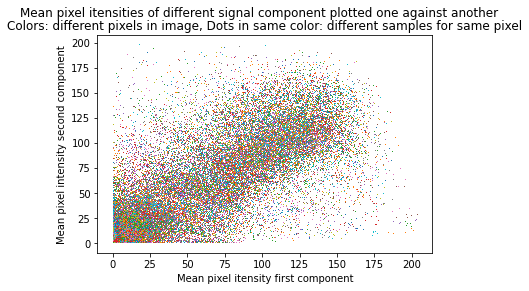

In [83]:
from utils.statistic import cross_cumulants
for i in range(28):
    for j in range(28):
        pxl = gens[:,0,i,j,0]
        pxl = np.stack([pxl, pxl], axis=1)
        #print(cross_cumulants(pxl))
for i in range(28):
    for j in range(28):
        plt.plot((gens[:,0,i,j,0]),(gens[:,1,i,j,0]),',')
plt.xlabel("Mean pixel itensity first component")
plt.ylabel("Mean pixel intensity second component")
plt.suptitle("Mean pixel itensities of different signal component plotted one against another")
plt.title("Colors: different pixels in image, Dots in same color: different samples for same pixel")
plt.show()
#plt.plot(gens[:,0,14,14,0],gens[:,2,14,14,0],'.')
#plt.plot(gens[:,1,14,14,0],gens[:,2,14,14,0],'.')